# Fraud Analysis - Cloudwalk Case

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Taking a look at the data
data = pd.read_csv('transactional-sample.csv')

data.head(3)

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475.0,False
1,21320399,92895,2708,444456******4210,2019-12-01T22:45:37.873639,734.87,497105.0,True
2,21320400,47759,14777,425850******7024,2019-12-01T22:22:43.021495,760.36,NaN,False


## EDA - Exploratory Data Analysis

### Understanding the data better

#### Dataset Structure

**Key observations**
* The dataset has **3199** transactions with **8** columns.
* The only column with missing values is **`device_id`**.
* The dataset has no duplicated values

**Column descriptions:**

* **`transaction_id`**: Unique identifier for each transaction (*int64*).
* **`merchant_id`**: Unique identifier for each merchant (*int64*).
* **`user_id`**: Unique identifier for each customer (*int64*).
* **`card_number`**: The card number used for the transaction (*object*).
* **`transaction_date`**: The date when the transaction ocurred (*object*).
* **`transaction_amount`**: The amount spent in the transaction (*float64*).
* **`device_id`**: Unique identifier of the device used for the transaction (*float64*), with 830 missing values.
* **`has_cbk`**: Boolean flag indicating if the transaction resulted in a chargeback (*bool*). Containing **2080** transactions without a chargeback and **391** with a chargeback.

**Closer look in the identification columns:**

* **`merchant_id`**: **1756** unique merchants.
* **`user_id`**: **2704** unique users.
* **`device_id`** **1996** unique devices.

In [3]:
print(f"Number of transactions: {len(data)}.")
print('-'*150)
print(f"Columns in the dataset {list(data.columns)}.")

Number of transactions: 3199.
------------------------------------------------------------------------------------------------------------------------------------------------------
Columns in the dataset ['transaction_id', 'merchant_id', 'user_id', 'card_number', 'transaction_date', 'transaction_amount', 'device_id', 'has_cbk'].


In [4]:
data.info() # Taking a look general informations about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199 entries, 0 to 3198
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      3199 non-null   int64  
 1   merchant_id         3199 non-null   int64  
 2   user_id             3199 non-null   int64  
 3   card_number         3199 non-null   object 
 4   transaction_date    3199 non-null   object 
 5   transaction_amount  3199 non-null   float64
 6   device_id           2369 non-null   float64
 7   has_cbk             3199 non-null   bool   
dtypes: bool(1), float64(2), int64(3), object(2)
memory usage: 178.2+ KB


In [5]:
data.isna().sum() # Checking for missing values

transaction_id          0
merchant_id             0
user_id                 0
card_number             0
transaction_date        0
transaction_amount      0
device_id             830
has_cbk                 0
dtype: int64

In [6]:
data.duplicated().sum() # Checking for duplicates

np.int64(0)

In [7]:
# It looks like the date column is a Object type, let's transform it to a datetime.
data['transaction_date'] = pd.to_datetime(data['transaction_date'], format="%Y-%m-%dT%H:%M:%S.%f")

print(f"Data type of the transaction_date column after transformation: {data['transaction_date'].dtype}")
data[['transaction_date']].head()

Data type of the transaction_date column after transformation: datetime64[ns]


,transaction_date
0,2019-12-01 23:16:32.812632
1,2019-12-01 22:45:37.873639
2,2019-12-01 22:22:43.021495
3,2019-12-01 21:59:19.797129
4,2019-12-01 21:30:53.347051


has_cbk
False    2808
True      391
Name: count, dtype: int64


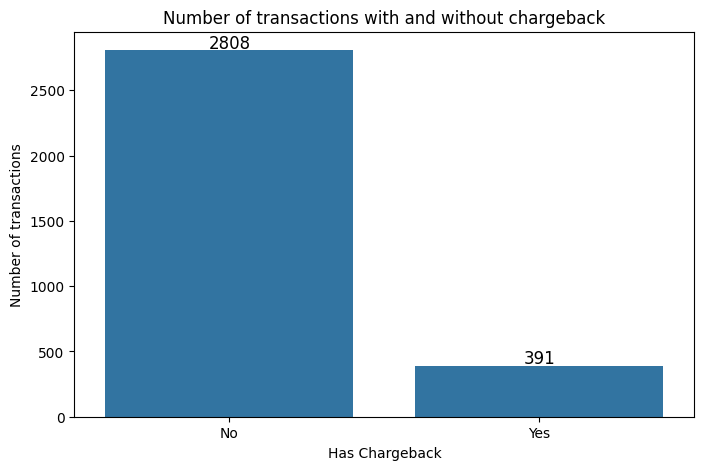

In [29]:
print(data['has_cbk'].value_counts())

fig = plt.figure(figsize=(8, 5))
ax = sns.barplot(x=data['has_cbk'], y=data['has_cbk'].value_counts())

plt.title('Number of transactions with and without chargeback')
plt.ylabel('Number of transactions')
plt.xlabel('Has Chargeback')

plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()

In [8]:
# checking for unique values in identification columns
for col in ['merchant_id', 'user_id', 'device_id']:
    print(f"{col}: {data[col].nunique()} unique values.")

merchant_id: 1756 unique values.
user_id: 2704 unique values.
device_id: 1996 unique values.


#### Summary Statistics for Transaction Amounts

* **Count**: The dataset contains **3199** transactions
* **Mean**: The average transaction amount is **$767.81**
* **Std dev**: A high standard deviation (**$889.10**) indicates significant variability in transaction amounts.
* **Min**: The smallest transaction recorded is **$1.22**
* **25% (First Quartile)**: 25% of transactions are below **$205.23**.
* **50% (Median)**: The middle transaction amount is **$415.94**.
* **75% (Third Quartile)**: 75% of transactions are below **$981.68**.
* **Max**: The largest transaction recorded is **$4097.21**.

In [9]:
print(data['transaction_amount'].describe()) # Taking a look at the basic statistics of the transaction amount column


count    3199.000000
mean      767.812904
std       889.095904
min         1.220000
25%       205.235000
50%       415.940000
75%       981.680000
max      4097.210000
Name: transaction_amount, dtype: float64
